# Company Data (problem statement)

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
import pandas as pd 
from pandas import read_csv

filename="/content/Company_Data.csv"

dataframe=read_csv(filename)

### EDA

In [3]:
dataframe

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
dataframe.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
#convert categorical value

bins = [0,7.49, np.inf]   #infinite values=np.inf
names = ['bad', 'Good']

dataframe['Sales.S'] = pd.cut(dataframe['Sales'], bins, labels=names)

dataframe['Sales.S']

0      Good
1      Good
2      Good
3       bad
4       bad
       ... 
395    Good
396     bad
397     bad
398     bad
399    Good
Name: Sales.S, Length: 400, dtype: category
Categories (2, object): ['bad' < 'Good']

In [7]:
dataframe.drop(["Sales"], axis =1, inplace = True)

In [8]:
dataframe

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,bad
4,141,64,3,340,128,Bad,38,13,Yes,No,bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,139,23,3,37,120,Medium,55,11,No,Yes,bad
397,162,26,12,368,159,Medium,40,18,Yes,Yes,bad
398,100,79,7,284,95,Bad,50,12,Yes,Yes,bad


In [9]:
dataframe.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales.S        1
dtype: int64

In [10]:
dataframe.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
Sales.S        category
dtype: object

### Decision Tree

In [11]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     ShelveLoc  Urban  US
0            0      0   0
1            1      0   0
2            2      0   0
3            2      0   0
4            0      0   1
..         ...    ...  ..
395          1      0   0
396          2      1   0
397          2      0   0
398          0      0   0
399          1      0   0

[400 rows x 3 columns]


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int64   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int64   
 9   US           400 non-null    int64   
 10  Sales.S      399 non-null    category
dtypes: category(1), int64(10)
memory usage: 31.9 KB


In [13]:
dataframe['Sales.S']=dataframe['Sales.S'].map({'Good':1,'Medium':2,'Bad':3})

In [14]:
dataframe['Sales.S'] =dataframe['Sales.S'].fillna(0)

In [15]:
dataframe

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,0,42,17,0,0,1.0
1,111,48,16,260,83,1,65,10,0,0,1.0
2,113,35,10,269,80,2,59,12,0,0,1.0
3,117,100,4,466,97,2,55,14,0,0,0.0
4,141,64,3,340,128,0,38,13,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,1.0
396,139,23,3,37,120,2,55,11,1,0,0.0
397,162,26,12,368,159,2,40,18,0,0,0.0
398,100,79,7,284,95,0,50,12,0,0,0.0


In [16]:
array=dataframe.values
x=dataframe.iloc[:,:10]
y=dataframe['Sales.S']
seed=7  

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)  # default 80% training 20% test

In [18]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

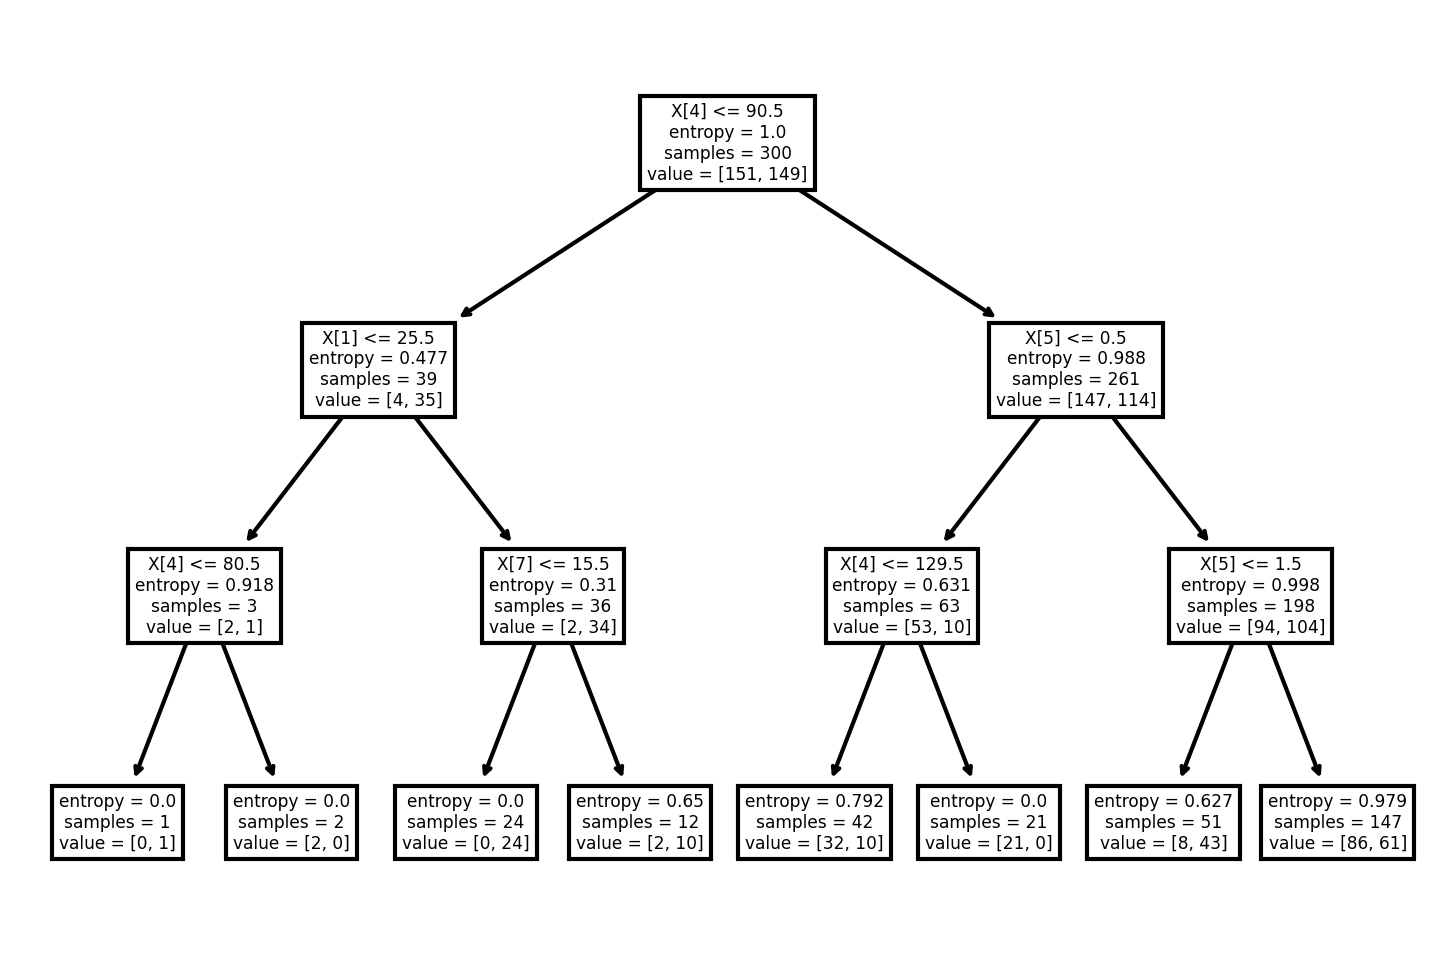

In [19]:
#PLot the decision tree
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(dtc);

## Bagging

In [20]:
# importing Decision Tree for Classifiction 
import pandas as pd 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



In [21]:
array=dataframe.values
x=dataframe.iloc[:,:10]
y=dataframe['Sales.S']
seed=7  

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [23]:
y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: Sales.S, Length: 400, dtype: float64

In [24]:
 # evaluation method(random_state=seed,shuffle=True)=denotes bootstrap method, # if no suffle it will adopt cross valiadation
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)  
cart=DecisionTreeClassifier()
num_tree=100   # will create 100 decision tree 

model=BaggingClassifier(base_estimator=cart,n_estimators=num_tree,random_state=seed)  # classifier
results=cross_val_score(model,x,y,cv=kfold)

print(results.mean())

0.7874999999999999


In [25]:
results

array([0.65 , 0.725, 0.8  , 0.675, 0.95 , 0.825, 0.85 , 0.825, 0.725,
       0.85 ])

## Random forest Classification

In [26]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [27]:
array=dataframe.values
x=dataframe.iloc[:,:10]
y=dataframe['Sales.S']
seed=7  

In [28]:
from pandas.core.reshape.merge import Suffixes
num_tree=100
max_features=3

kfold=KFold(n_splits=10,random_state=7,shuffle=True) # bootstrap

model=RandomForestClassifier(n_estimators=num_tree,max_features=max_features)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7875000000000001


In [29]:
results

array([0.725, 0.675, 0.775, 0.725, 0.9  , 0.85 , 0.8  , 0.825, 0.775,
       0.825])

## Boosting (AdaBoost)

In [30]:
 from pandas import read_csv
 from numpy import array
 from sklearn.model_selection import KFold 
 from sklearn.model_selection import cross_val_score
 from sklearn.ensemble import AdaBoostClassifier

In [31]:
array=dataframe.values
x=dataframe.iloc[:,:10]
y=dataframe['Sales.S']

In [32]:
num_tree=10
seed=7

kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
model=AdaBoostClassifier(n_estimators=num_tree,random_state=seed)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7699999999999999


In [33]:
result

array([0.6  , 0.75 , 0.825, 0.85 , 0.85 , 0.85 , 0.75 , 0.85 , 0.725,
       0.65 ])

## Stacking Ensemble for Classification

In [34]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [35]:
array=dataframe.values
x=dataframe.iloc[:,:10]
y=dataframe['Sales.S']

In [36]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [37]:
# Creating sub models

estimators=[]
model1=LogisticRegression(max_iter=5000)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))

In [38]:
# Create the Ensemble model

from sklearn import ensemble
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(result.mean())

0.7699999999999999


In [39]:
estimators

[('logistic', LogisticRegression(max_iter=5000)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

# Fraudcheck(Problem_statement)

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree

In [41]:
import pandas as pd 
from pandas import read_csv

filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

In [42]:
#convert categorical value
import numpy as np

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

dataframe['Taxable.Income'] = pd.cut(dataframe['Taxable.Income'], bins, labels=names)

dataframe['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [43]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [44]:
dataframe

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,Good,50047,10,0
1,1,1,Good,134075,18,0
2,0,2,Good,160205,30,0
3,1,0,Good,193264,15,0
4,0,2,Good,27533,28,1
...,...,...,...,...,...,...
595,1,1,Good,39492,7,0
596,1,1,Good,55369,2,0
597,0,1,Good,154058,0,0
598,1,2,Good,180083,17,1


### Decision Tree

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)  # default 80% training 20% test

In [46]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

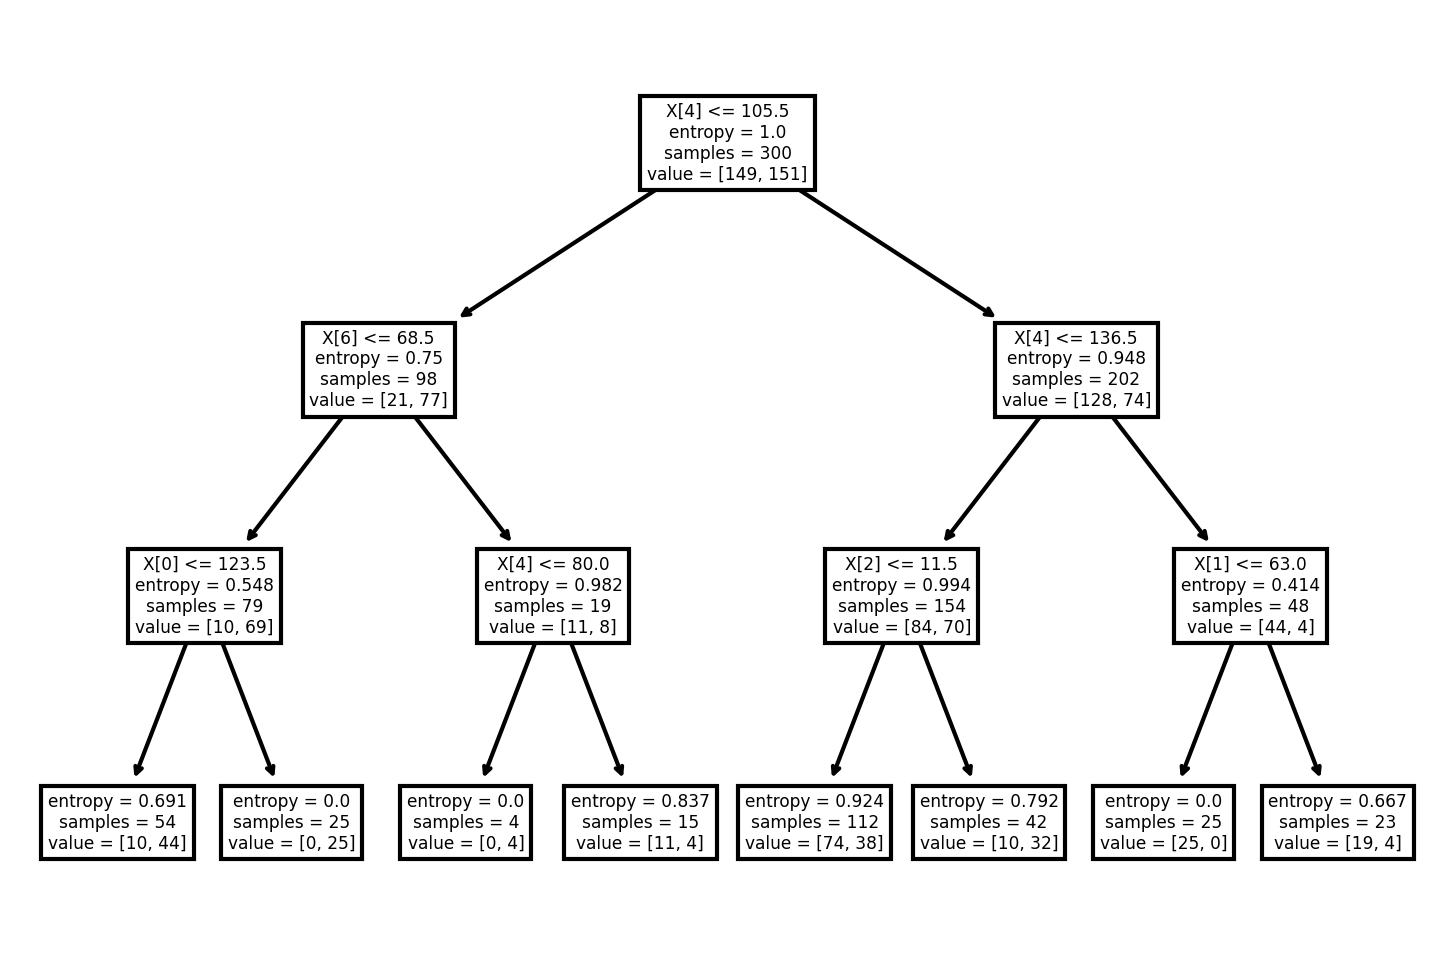

In [47]:
#PLot the decision tree
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(dtc);

## Bagging

In [48]:
# importing Decision Tree for Classifiction 
import pandas as pd 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

#array=dataframe.values
#X=array[:,:8]
#Y=array[:,8]
#seed=7  

In [49]:
filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

#convert categorical value
import numpy as np

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

dataframe['Taxable.Income'] = pd.cut(dataframe['Taxable.Income'], bins, labels=names)

dataframe['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [50]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [51]:
#feture selection
y = dataframe['Taxable.Income']
dataframe.drop(['Taxable.Income'], axis=1, inplace=True)
x = dataframe
del dataframe
seed=7  

In [52]:
 # evaluation method(random_state=seed,shuffle=True)=denotes bootstrap method, # if no suffle it will adopt cross valiadation
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)  
cart=DecisionTreeClassifier()
num_tree=100   # will create 100 decision tree 

model=BaggingClassifier(base_estimator=cart,n_estimators=num_tree,random_state=seed)  # classifier
results=cross_val_score(model,x,y,cv=kfold)

print(results.mean())

0.745


In [53]:
results

array([0.76666667, 0.68333333, 0.83333333, 0.83333333, 0.71666667,
       0.7       , 0.76666667, 0.63333333, 0.76666667, 0.75      ])

## Random forest Classification

In [54]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [55]:
filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

#convert categorical value
import numpy as np

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

dataframe['Taxable.Income'] = pd.cut(dataframe['Taxable.Income'], bins, labels=names)

dataframe['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [56]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [57]:
from pandas.core.reshape.merge import Suffixes
num_tree=100
max_features=3

kfold=KFold(n_splits=10,random_state=7,shuffle=True) # bootstrap

model=RandomForestClassifier(n_estimators=num_tree,max_features=max_features)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.745


In [58]:
results

array([0.76666667, 0.68333333, 0.83333333, 0.8       , 0.73333333,
       0.68333333, 0.73333333, 0.66666667, 0.8       , 0.75      ])

## Boosting (AdaBoost)

In [59]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [60]:
filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

#convert categorical value
import numpy as np

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

dataframe['Taxable.Income'] = pd.cut(dataframe['Taxable.Income'], bins, labels=names)

dataframe['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [61]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [62]:
num_tree=10
seed=7

kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
model=AdaBoostClassifier(n_estimators=num_tree,random_state=seed)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7933333333333332


In [63]:
result

array([0.78333333, 0.73333333, 0.86666667, 0.91666667, 0.75      ,
       0.76666667, 0.83333333, 0.66666667, 0.83333333, 0.78333333])

## Stacking Ensemble for Classification

In [64]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [65]:
filename="/content/Fraud_check.csv"

dataframe=read_csv(filename)

#convert categorical value
import numpy as np

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

dataframe['Taxable.Income'] = pd.cut(dataframe['Taxable.Income'], bins, labels=names)

dataframe['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [66]:
# for convert categorical to int

categorical = [col for col in dataframe.columns if dataframe[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in dataframe[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataframe[col] = [temp[x] for x in dataframe[col].values]
print(dataframe[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [67]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [68]:
# Creating sub models

estimators=[]
model1=LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))

In [69]:
# Create the Ensemble model

from sklearn import ensemble
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(result.mean())

0.7933333333333332


In [70]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]